In [5]:
def f(x):
    return x**2-4

def df(x):
    return 2*x

def dx(f, x):
    return abs(0-f(x))

def newtons_method(f, df, x0, e):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
    print('Root is at: ', x0)
    print('f(x) at root is: ', f(x0))
    
x0s = [-1, 3]
for x0 in x0s:
    newtons_method(f, df, x0, 1e-5)

Root is at:  -2.0000000929222947
f(x) at root is:  3.716891878724482e-07
Root is at:  2.000000000026214
f(x) at root is:  1.0485656787295738e-10


In [26]:
def f(x):
    return x**3 + x**2 - 6

def df(x):
    return 3*x**2 + 2*x

def ddf(x):
    return 6*x + 2

def newtons_method(f, df, x0, e):
    while(abs(0 - f(x0)) > e):
        x0 = x0 - f(x0)/df(x0)
    print('x:', x0)
    print('y:', f(x0))

x0s = [-1, 3]
e = 1e-5

for x0 in x0s:
    newtons_method(f, df, x0, e)
    newtons_method(df, ddf, x0, e)

x: 1.537656185231936
y: 1.3761515837984462e-07
x: -0.6666666821537157
y: 3.097409884134095e-08
x: 1.5376561721368756
y: 4.458405200580273e-09
x: 1.763188089766313e-06
y: 3.526385506029346e-06


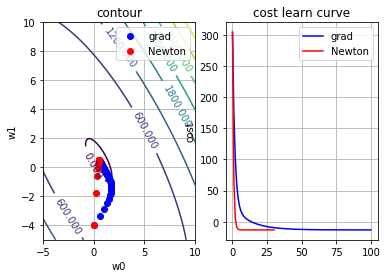

In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#copyRight by heibanke 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))

A = np.matrix([[4.0,2.0],[1.0,3.0]])
B = np.matrix([[3.0],[2.0]])

R=A.T.dot(A)
P=A.T.dot(B)

def cost_func(X,Y):
    return R[0,0]*(X**2)+R[1,1]*(Y**2)+(R[0,1]+R[1,0])*X*Y-2*P[0,0]*X-2*P[1,0]*Y

z = cost_func(X,Y)


# w, w_n分别用来存最速下降和牛顿法的迭代过程
w=np.matrix([[0],[-4]])
w_n=np.matrix([[0],[-4]])

# 梯度下降法
for i in range(100):
    w_t = w[:,-1]
    w=np.hstack((w,w_t-0.01*(R.dot(w_t)-P)))

# NewTon法 

#Hessian matrix
H=np.matrix([[2.0*R[0,0],R[0,1]+R[1,0]],[R[0,1]+R[1,0],2.0*R[1,1]]])

for i in range(30):
    w_t = w_n[:,-1]
    w_n=np.hstack((w_n,w_t-H.I.dot(R.dot(w_t)-P)))
    
w = np.array(w)
w_n = np.array(w_n)

# 学习曲线
L=cost_func(w[0,:], w[1,:])
L_n=cost_func(w_n[0,:], w_n[1,:])


# 输出图形
# 2d plot

f, (ax1, ax2) = plt.subplots(1, 2)
CS = ax1.contour(X, Y, z)
ax1.plot(w[0,:], w[1,:], 'bo',w_n[0,:],w_n[1,:],'ro')

ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_title('contour')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.legend(('grad', 'Newton'))
ax1.grid(True)


ax2.plot(range(101),L,'b',range(31),L_n,'r')
ax2.set_title('cost learn curve')
ax2.set_ylabel('cost')
ax2.legend(('grad', 'Newton'))
ax2.grid(True)



# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y, z, rstride=4, cstride=4, color='b')
ax.plot(w[0,:],w[1,:],L,'ro')
ax.plot(w_n[0,:],w_n[1,:],L_n,'go')
ax.legend(('grad', 'Newton'))

plt.show()

In [ ]:
http://blog.csdn.net/shouhuxianjian/article/details/46669365
http://blog.csdn.net/pipisorry/article/details/68961388
http://blog.csdn.net/mounty_fsc/article/details/51588794
https://en.wikipedia.org/wiki/Matrix_calculus

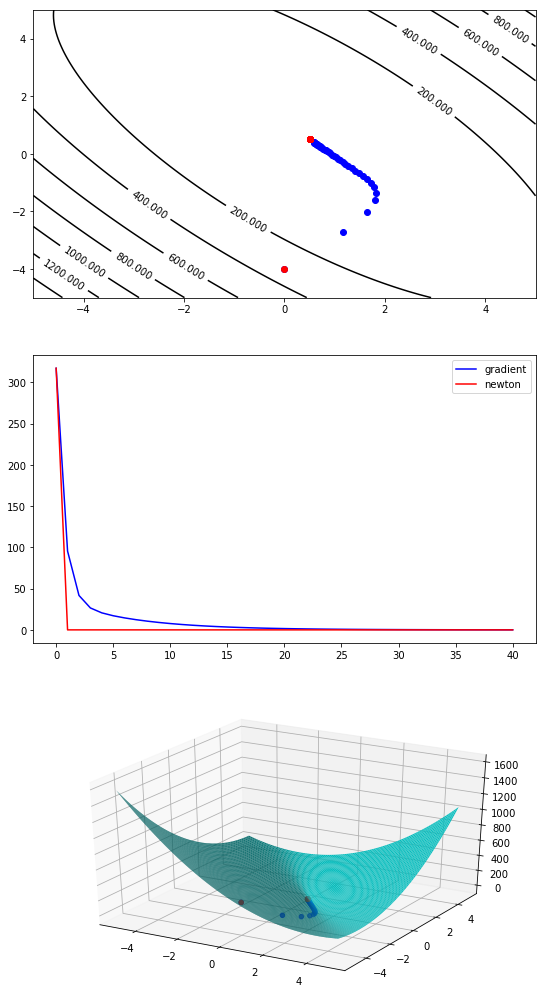

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = np.matrix([[4.0,2.0],[1.0,3.0]])
B = np.matrix([[3.0],[2.0]])

# 目标函数：(AX-B)^T(AX-B)
def f_objective(X):
    R = A.dot(X)-B
    return R.T.dot(R)

# 一阶导数：2A^TAX-2A^TB Jacobian矩阵 雅克比矩阵
def f_jacobian(X):
    return 2*A.T.dot(A).dot(X) - 2*A.T.dot(B)

# 二阶导数：2A^TA Hessian矩阵 海森矩阵
def f_hessian():
    return 2*A.T.dot(A)

# 根据目标函数求解在三维图中对应的Z值
def f_z(X, Y):
    Z = np.zeros(X.shape)
    for index in np.ndindex(X.shape):
        Z[index] = f_objective(np.matrix([[X[index]],[Y[index]]]))
    return Z
    
# 将X的两个维度分别当做三维图中的X,Y，X如果大于2维图形就表示不出来了
N = 100
X, Y = np.meshgrid(np.linspace(-5, 5, N), np.linspace(-5, 5, N))
Z = f_z(X, Y)

# 梯度下降法
data_gradient = np.matrix([[0],[-4]])
for i in range(40):
    data_gradient=np.hstack((data_gradient,data_gradient[:,-1] - 0.01 * f_jacobian(data_gradient[:,-1])))
z_gradient = f_z(data_gradient[0,:], data_gradient[1,:])
# z_gradient = np.array(z_gradient)

# 牛顿法 
data_newton = np.matrix([[0],[-4]])
for i in range(40):
    data_newton=np.hstack((data_newton,data_newton[:,-1] - f_hessian().I * f_jacobian(data_newton[:,-1])))
z_newton = f_z(data_newton[0,:], data_newton[1,:])
# z_newton = np.array(z_newton)

# 图形绘制
fig = plt.figure(figsize=(9,18))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313, projection='3d')

# 等高线
# cset = ax1.contourf(X, Y, Z)
c = ax1.contour(X, Y, Z, colors = 'black')
ax1.clabel(c)
ax1.plot(data_gradient[0], data_gradient[1],'bo')
ax1.plot(data_newton[0], data_newton[1], 'ro')

# 迭代图对比
ax2.plot(range(z_gradient.size), z_gradient[0], 'b')
ax2.plot(range(z_newton.size), z_newton[0], 'r')
ax2.legend(('gradient', 'newton'))

# 目标函数的3D图
ax3.plot_surface(X, Y, Z, rstride=1, cstride=1, color='c')
ax3.scatter(data_gradient[0], data_gradient[1], z_gradient, c='b')
ax3.scatter(data_newton[0], data_newton[1], z_newton, c='r')

plt.show()

In [2]:
%matplotlib inline